In [2]:
import random
import math
import os
import pylab
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import time
import pandas as pd
%matplotlib inline
output_dir = '/Users/Yaroslav/Desktop/Images'
output_dir2 = "/Users/Yaroslav/Desktop/Images"
pd.options.mode.chained_assignment = None

In [3]:
colors = ['r', 'b', 'g', 'orange', 'magenta', 'yellow', 'aqua', 'r', 'b', 'g', 'orange', 'magenta', 'yellow', 'r', 'aqua','g']
fix_time_lst = []

In [4]:
def direct_disks_box(N, sigma):
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 16.0 - sigma), random.uniform(sigma, 16.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 16.0 - sigma), random.uniform(sigma, 16.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L) 
            if min_dist < 2.0 * sigma: 
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return L
img = 0
if not os.path.exists(output_dir2): os.makedirs(output_dir)
def snapshot(t, pos, vel, colors, arrow_scale=.2):
    global img
    pylab.cla()
    pylab.axis([0, 16, 0, 16])
    pylab.grid(True)
    pylab.setp(pylab.gca(), xticks=[0, 16], yticks=[0, 16])
    for (x, y), (dx, dy), c in zip(pos, vel, colors):
        dx *= arrow_scale
        dy *= arrow_scale
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
        pylab.arrow( x, y, dx, dy, fc="k", ec="k", head_width=0.05, head_length=0.05 )
    pylab.text(.5, 1.03, 't = %.2f' % t, ha='center')
    pylab.grid(True)
    pylab.savefig(os.path.join(output_dir, '%04i.png' % img))
    img += 1


In [6]:
# time to reach the wall
def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (16.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

# time to reach another disk
def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * (del_x_sq - 4.0 * sigma ** 2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

def min_arg(l):
    return min(zip(l, range(len(l))))

def compute_next_event(pos, vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(wall_times + pair_times)
def compute_next_event_cells(pos, vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
    pairs = get_pairs()
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(wall_times + pair_times)

def compute_pair_event(pos, vel):
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(pair_times)

def compute_new_velocities(pos, vel, next_event_arg):
    if next_event_arg < len(singles):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[next_event_arg - len(singles)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal


In [7]:
def dist (a, b):
   """ distance between two two-dimensional points a and b"""
   delta_x = (a[0] - b[0])
   delta_y = (a[1] - b[1])
   return norm (delta_x, delta_y)
def dist_v (a, b):
   """ distance between two two-dimensional points a and b"""
   delta_x = (a[0] - b[0])
   delta_y = (a[1] - b[1])
   return [delta_x, delta_y]

def norm (x, y):
    """norm of a two-dimensional vector"""
    return (x*x + y*y) ** 0.5
def scalar(x,y):
    return (x[0]*y[0] + x[1]*y[1])

# Without cell - method

0.1400653488589596
time 0.25
0.12182411266640536
time 0.5
0.07783581076957335
time 0.75
0.09662978496914587
time 1.0
0.25
time 1.25
0.003768061691883151
time 1.5
0.25
time 1.75
0.25
time 2.0
0.16953583630779478
time 2.25
0.25
time 2.5
Elapsed time 2.4435842037200928


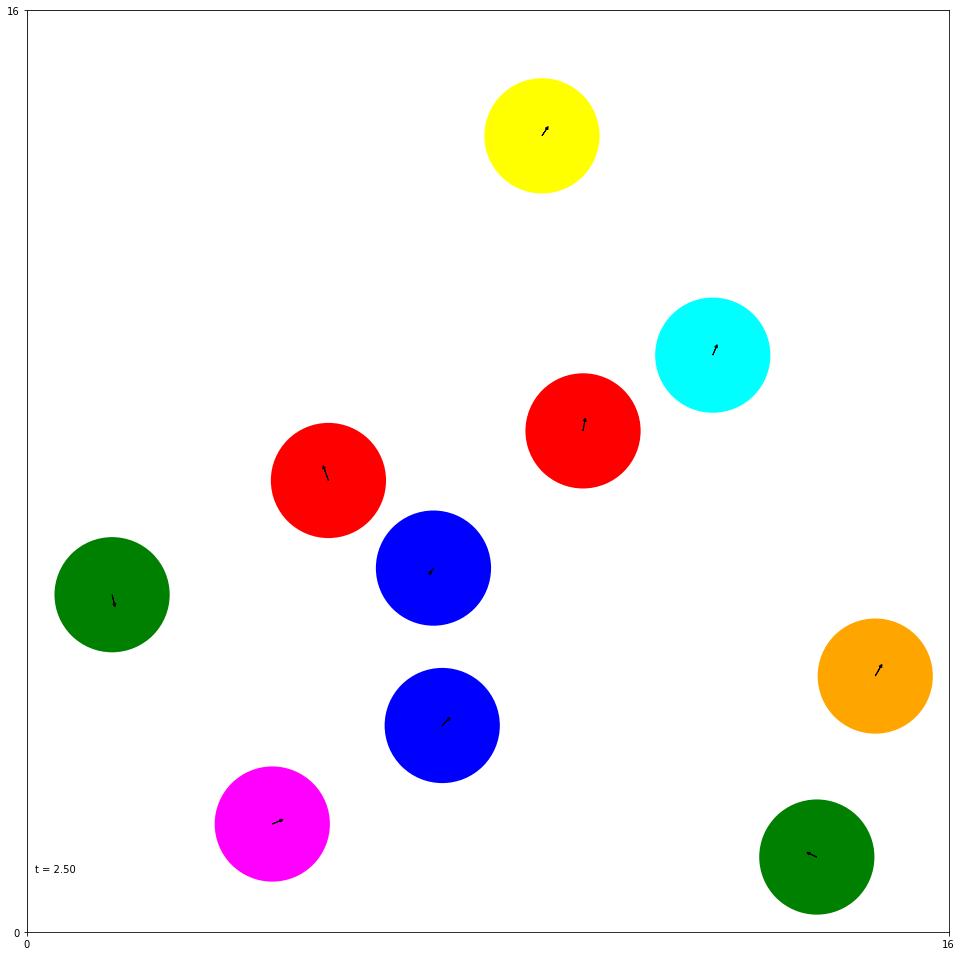

In [15]:
start_time = time.time()

pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
pylab.gcf().set_size_inches(16, 16)
img = 0
sigma = 1  # radius
t = 0.0    # start time
dt = 0.25     # dt=0 corresponds to event-to-event animation
n_steps = 10
# 10 disks
#pos = [[4.463191404840118, 6.19123316270451],
# [1.627027851140511, 3.6961908799613816],
# [1.3431960236103038, 1.021100095422872],
# [7.640193160602836, 1.01486489987931],
# [7.209054631246051, 6.970585448383236],
# [8.171726919348593, 8.890904037841427],
# [6.963892502585488, 3.563406437614188],
# [1.2238746799707734, 8.727599966401753],
# [5.19038020443, 8.908466515143294],
# [1.2276905017296267, 5.79964980336199]]


pos = [[9.808842091076627, 6.865939943544603], 
       [7.598628119917539, 5.436089923577787], 
       [1.021986930228208, 7.8522291815503875], 
       [13.363710306791141, 2.8161751038100387], 
       [2.509576532907246, 1.1207967780923749], 
       [7.941311926349005, 12.318798041448767], 
       [12.178167114183278, 9.115814263386335], 
       [4.767055972084483, 5.938936805888761], 
       [5.959615768228026, 2.3314424067451576], 
       [14.640236456051092, 1.0756819860459115]]


vel = [[0.1, 0.9], [0.2, 0.8], [-0.2, -0.8], [0.9, 0.1],
      [0.7, 0.3], [0.4, 0.6], [-0.8, -0.2], [0.3, 0.7],
      [0.5, 0.5], [0.6, 0.4]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1),
          (4, 0), (4, 1),(5, 0), (5, 1),(6, 0), (6, 1),(7, 0), (7, 1),
          (8, 0), (8, 1),(9, 0), (9, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
         (0, 6), (0, 7), (0, 8), (0, 9),
         (1, 2), (1, 3), (1, 4), (1, 5),
         (1, 6), (1, 7), (1, 8), (1, 9),
         (2, 3), (2, 4), (2, 5), (2, 6), 
         (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), 
         (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), 
         (4, 7), (4, 8), (4, 9), (5, 6), 
         (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9),
         (7, 8), (7, 9),
         (8, 9)]

next_event, next_event_arg = compute_next_event(pos, vel)
snapshot(t, pos, vel, colors)

for step in range(n_steps):
    if dt:
        next_t = t + dt
    else:
        next_t = t + next_event
    while t + next_event <= next_t:
        t += next_event
        for k, l in singles: pos[k][l] += vel[k][l] * next_event
        compute_new_velocities(pos, vel, next_event_arg)
        next_event, next_event_arg = compute_next_event(pos, vel)
    remain_t = next_t - t
    print (remain_t)
    fix_time_lst.append (remain_t)
    
    for k, l in singles: 
        pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    snapshot(t, pos, vel, colors)
    print ('time',t)
elapsed_time = time.time() - start_time
print("Elapsed time", elapsed_time)

# With cell - method

In [19]:
start_time = time.time()
img = 0
sigma = 1  # radius
t = 0.0    # start time
dt = 0.25     # dt=0 corresponds to event-to-event animation
n_steps = 10
data = pd.DataFrame(columns=['pos_x', 'pos_y', 'vel_x', 'vel_y', 'cell'])
pos = [[9.808842091076627, 6.865939943544603], 
       [7.598628119917539, 5.436089923577787], 
       [1.021986930228208, 7.8522291815503875], 
       [13.363710306791141, 2.8161751038100387], 
       [2.509576532907246, 1.1207967780923749], 
       [7.941311926349005, 12.318798041448767], 
       [12.178167114183278, 9.115814263386335], 
       [4.767055972084483, 5.938936805888761], 
       [5.959615768228026, 2.3314424067451576], 
       [14.640236456051092, 1.0756819860459115]]
vel = [[0.1, 0.9], [0.2, 0.8], [-0.2, -0.8], [0.9, 0.1],
      [0.7, 0.3], [0.4, 0.6], [-0.8, -0.2], [0.3, 0.7],
      [0.5, 0.5], [0.6, 0.4]]


In [22]:
data = pd.DataFrame(columns=['pos_x', 'pos_y', 'vel_x', 'vel_y', 'cell'])
for i in pos:
    df_tmp = pd.DataFrame({'pos_x':[i[0]], 'pos_y':[i[1]]})
    data = data.append(df_tmp, ignore_index=True)

In [23]:
def refresh_data():
    global data
    k = 0
    for i in vel:
        data['vel_x'][k] = i[0]
        data['vel_y'][k] = i[1]
        k +=1;
    for index, row in data.iterrows():
        if (row['pos_x'] > 0) and (row['pos_x'] < 4) and (row['pos_y'] > 0) and (row['pos_y'] < 4):
            data['cell'][index] = 1
        if (row['pos_x'] > 4) and (row['pos_x'] < 8) and (row['pos_y'] > 0) and (row['pos_y'] < 4):
            data['cell'][index] = 2
        if (row['pos_x'] > 8) and (row['pos_x'] < 12) and (row['pos_y'] > 0) and (row['pos_y'] < 4):
            data['cell'][index] = 3
        if (row['pos_x'] > 12) and (row['pos_x'] < 16) and (row['pos_y'] > 0) and (row['pos_y'] < 4):
            data['cell'][index] = 4

        if (row['pos_x'] > 0) and (row['pos_x'] < 4) and (row['pos_y'] > 4) and (row['pos_y'] < 8):
            data['cell'][index] = 5
        if (row['pos_x'] > 4) and (row['pos_x'] < 8) and (row['pos_y'] > 4) and (row['pos_y'] < 8):
            data['cell'][index] = 6
        if (row['pos_x'] > 8) and (row['pos_x'] < 12) and (row['pos_y'] > 4) and (row['pos_y'] < 8):
            data['cell'][index] = 7
        if (row['pos_x'] > 12) and (row['pos_x'] < 16) and (row['pos_y'] > 4) and (row['pos_y'] < 8):
            data['cell'][index] = 8    

        if (row['pos_x'] > 0) and (row['pos_x'] < 4) and (row['pos_y'] > 8) and (row['pos_y'] < 12):
            data['cell'][index] = 9
        if (row['pos_x'] > 4) and (row['pos_x'] < 8) and (row['pos_y'] > 8) and (row['pos_y'] < 12):
            data['cell'][index] = 10
        if (row['pos_x'] > 8) and (row['pos_x'] < 12) and (row['pos_y'] > 8) and (row['pos_y'] < 12):
            data['cell'][index] = 11
        if (row['pos_x'] > 12) and (row['pos_x'] < 16) and (row['pos_y'] > 8) and (row['pos_y'] < 12):
            data['cell'][index] = 12    

        if (row['pos_x'] > 0) and (row['pos_x'] < 4) and (row['pos_y'] > 12) and (row['pos_y'] < 16):
            data['cell'][index] = 13
        if (row['pos_x'] > 4) and (row['pos_x'] < 8) and (row['pos_y'] > 12) and (row['pos_y'] < 16):
            data['cell'][index] = 14
        if (row['pos_x'] > 8) and (row['pos_x'] < 12) and (row['pos_y'] > 12) and (row['pos_y'] < 16):
            data['cell'][index] = 15
        if (row['pos_x'] > 12) and (row['pos_x'] < 16) and (row['pos_y'] > 12) and (row['pos_y'] < 16):
            data['cell'][index] = 16
matching = [
    (1,1), (1,2), (1,5), (2,2), (2,3), (2,1), (2,6), (3,3), (3,2), (3,4), (3,7), (4,4), (4,3), (4,8),
    (5,5), (5,1), (5,6), (5,9), (6,6), (6,5), (6,2), (6,7), (6,10), (7,7), (7,6), (7,3), (7,8), (7,11),
    (8,8), (8,7), (8,4), (8,12),
    (9,9), (9,5), (9,10), (9,13), (10,10), (10,9), (10,6), (10,11), (10,14), (11,11), (11,10), (11,7), (11,12), (11,15),
    (12,12), (12,11), (12,8), (12,16),
    (13,13), (13,9), (13,14), (14,14), (14,13), (14,10), (14,15), (15,15), (15,14), (15,11), (15,16), (16,16), (16,15), (16,12)]

def get_pairs():
    global pairs
    refresh_data()
    pairs_new = []
    for m in matching:
        for index1, row1 in data.iterrows():
            for index2, row2 in data.iterrows():
                if (index2>index1) and  (row1['cell'] == m[0]) and (row2['cell'] == m[1]):
                    pairs_new.append((index1, index2))
    return pairs_new


In [24]:
pairs = get_pairs()
print(pairs)

[(4, 8), (3, 9), (2, 4), (2, 7), (1, 7), (1, 2), (1, 8), (7, 8), (0, 1), (0, 7)]


0.3278358107695739
time 1.0
0.5037680616918894
time 2.0
1.0
time 3.0
0.9001868965464639
time 4.0
0.5313300690812772
time 5.0
1.0
time 6.0
1.0
time 7.0
1.0
time 8.0
0.35448356894477584
time 9.0
0.4723125671782977
time 10.0
Elapsed time 103.26262497901917


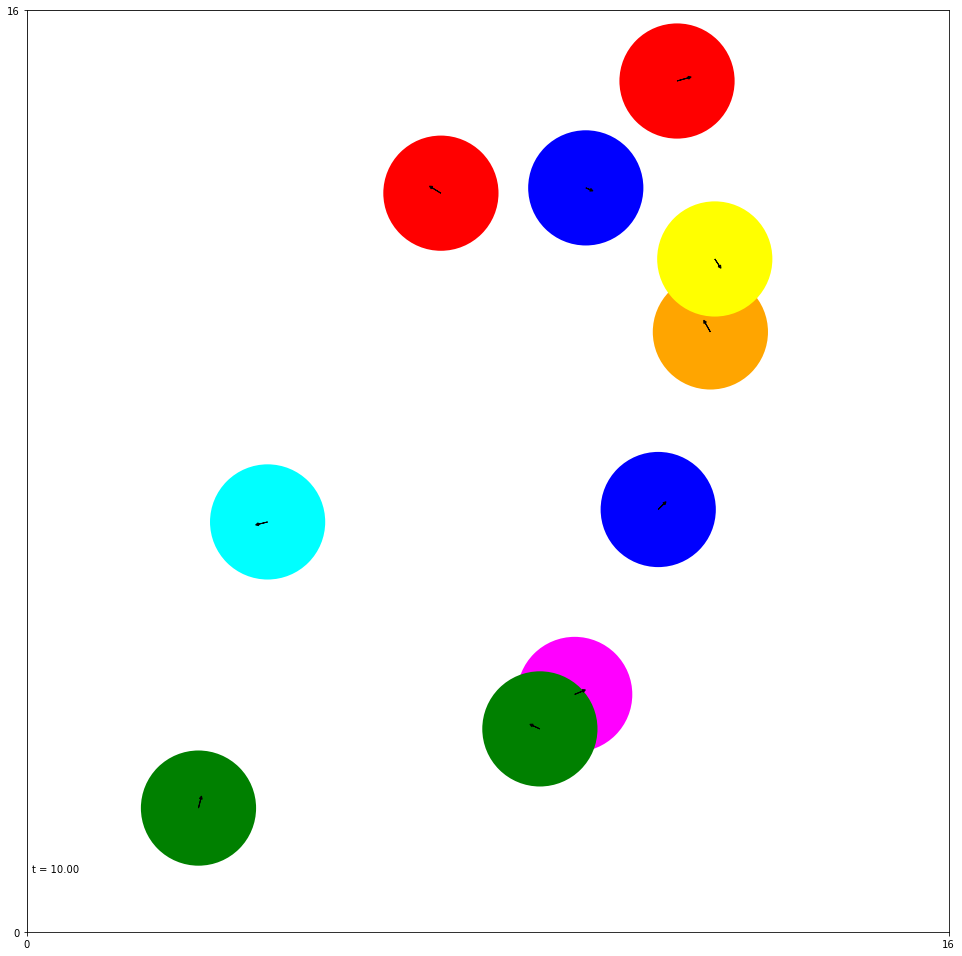

In [26]:
pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
pylab.gcf().set_size_inches(16, 16)
sigma = 1  # radius
t = 0.0    # start time
dt = 1     # dt=0 corresponds to event-to-event animation
n_steps = 10
# 10 disks

pos = [[9.808842091076627, 6.865939943544603], 
       [7.598628119917539, 5.436089923577787], 
       [1.021986930228208, 7.8522291815503875], 
       [13.363710306791141, 2.8161751038100387], 
       [2.509576532907246, 1.1207967780923749], 
       [7.941311926349005, 12.318798041448767], 
       [12.178167114183278, 9.115814263386335], 
       [4.767055972084483, 5.938936805888761], 
       [5.959615768228026, 2.3314424067451576], 
       [14.640236456051092, 1.0756819860459115]]


vel = [[0.1, 0.9], [0.2, 0.8], [-0.2, -0.8], [0.9, 0.1],
      [0.7, 0.3], [0.4, 0.6], [-0.8, -0.2], [0.3, 0.7],
      [0.5, 0.5], [0.6, 0.4]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1),
          (4, 0), (4, 1),(5, 0), (5, 1),(6, 0), (6, 1),(7, 0), (7, 1),
          (8, 0), (8, 1),(9, 0), (9, 1)]

pairs = get_pairs()

next_event, next_event_arg = compute_next_event(pos, vel)
snapshot(t, pos, vel, colors)

for step in range(n_steps):
    if dt:
        next_t = t + dt
    else:
        next_t = t + next_event
    while t + next_event <= next_t:
        t += next_event
        for k, l in singles: pos[k][l] += vel[k][l] * next_event
        compute_new_velocities(pos, vel, next_event_arg)
        pairs = get_pairs()
        next_event, next_event_arg = compute_next_event(pos, vel)
    remain_t = next_t - t
    print (remain_t)
    fix_time_lst.append (remain_t)
    
    for k, l in singles: 
        pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    snapshot(t, pos, vel, colors)
    print ('time',t)
elapsed_time = time.time() - start_time
print("Elapsed time", elapsed_time)
